In [2]:
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\18126\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18126\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Let's load a sample text
sample_text = gutenberg.raw('shakespeare-macbeth.txt')

# Preprocess the text
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    return ' '.join(words)

preprocessed_text = preprocess_text(sample_text)

In [4]:
# Let's vectorize the text
vectorizer = CountVectorizer(stop_words = 'english')
text_vectorized = vectorizer.fit_transform([preprocessed_text])


In [5]:
# Let's apply some LDA now 
lda_model = LatentDirichletAllocation(n_components = 5, random_state = 42)
lda_topics = lda_model.fit_transform(text_vectorized)

In [7]:
# Function to display top words for each topic 

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f'Topic{topic_idx + 1}'] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        return topics

lda_topics_words = display_topics(lda_model, vectorizer.get_feature_names_out(), 10)
print(lda_topics_words)

{'Topic1': ['youths', 'harpier', 'harnesse', 'hare', 'hardly', 'hardie', 'harbingers', 'happyer', 'happinesse', 'happily']}


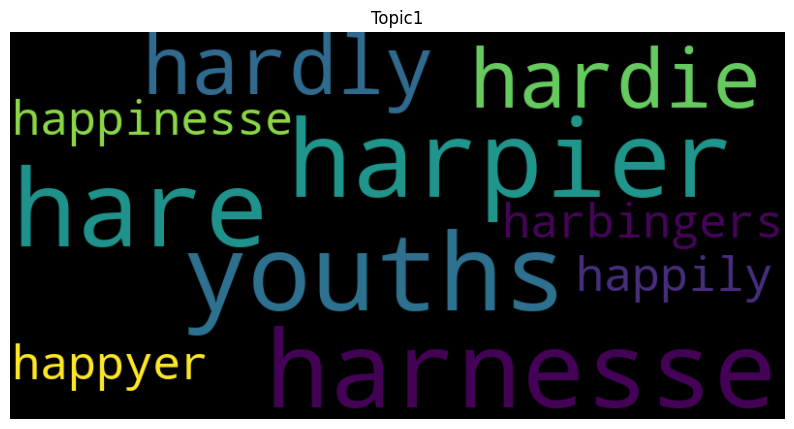

In [11]:
# Now, we can createclouds for each topic 

for topic_idx, topic in lda_topics_words.items():
    wordcloud = WordCloud(width = 800, height = 400, max_font_size= 110).generate(' '.join(topic))
    plt.figure(figsize = (10, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(topic_idx)
    plt.show()